<a href="https://colab.research.google.com/github/prithviemmidi/LifeSatisfaction_Analysis/blob/main/Decision_Tree_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [388]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.tree import plot_tree

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [389]:
path = "/content/drive/MyDrive/lifesat_csv.csv"
df_old = pd.read_csv(path)
df_old.head()

,pidp,agenew,incomecpi,male,neduc,ueduc,oheduc,Alevel,gcse,otheduc,...,member34,othersize,pomst,agesq,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std,yearid
0,68035365,45,1981.589,1,0,0,0,0,0,1,...,0,0,0.00000,2025,1.134772,1.7147,1.33485,0.318156,-0.471428,1
1,68035365,46,2110.081,1,0,0,0,0,0,1,...,0,0,33.33333,2116,1.134772,1.7147,1.33485,0.318156,-0.471428,2
2,68035365,46,2351.826,1,0,0,0,0,0,1,...,0,0,66.66666,2116,1.134772,1.7147,1.33485,0.318156,-0.471428,3
3,68035365,48,2219.140,1,0,0,0,0,0,1,...,0,0,66.66666,2304,1.134772,1.7147,1.33485,0.318156,-0.471428,4
4,68035365,49,2498.854,1,0,0,0,0,0,1,...,0,0,50.00000,2401,1.134772,1.7147,1.33485,0.318156,-0.471428,5


In [390]:
agg_rules = {col: 'mean' for col in df_old.columns if col != 'pidp'}
agg_rules['male'] = 'max'

df = df_old.groupby('pidp').agg(agg_rules).reset_index()

print(f"Original rows in df_old: {len(df_old)}")
print(f"Unique individuals in df: {len(df)}")
print(f"\nColumns in df:")
print(df.columns.tolist())

Original rows in df_old: 25128
Unique individuals in df: 1047

Columns in df:
['pidp', 'agenew', 'incomecpi', 'male', 'neduc', 'ueduc', 'oheduc', 'Alevel', 'gcse', 'otheduc', 'single', 'married', 'others', 'selfemploy', 'employed', 'unemploy', 'retired', 'sick', 'familycare', 'student', 'onemember', 'twomember', 'member34', 'othersize', 'pomst', 'agesq', 'openness_std', 'neuroticism_std', 'agreeableness_std', 'extraversion_std', 'conscientiousness_std', 'yearid']


In [391]:
df.head()

,pidp,agenew,incomecpi,male,neduc,ueduc,oheduc,Alevel,gcse,otheduc,...,member34,othersize,pomst,agesq,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std,yearid
0,68035365,57.041667,2493.496375,1,0.0,0.0,0.0,0.0,0.0,1.0,...,0.000000,0.000000,40.972220,3308.041667,1.134772,1.714700,1.334850,0.318156,-0.471428,12.5
1,68058485,64.291667,4008.875375,1,0.0,0.0,0.0,0.0,1.0,0.0,...,0.125000,0.083333,58.333329,4185.458333,-0.410277,1.714700,-0.626826,-0.449034,-0.471428,12.5
2,68058489,64.291667,4008.875375,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.125000,0.083333,78.472226,4185.458333,-1.955325,0.315594,-0.626826,-0.449034,-0.471428,12.5
3,68064609,57.291667,4231.804125,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.166667,0.125000,61.111114,3334.375000,0.362247,-0.383959,1.334850,1.085346,1.368915,12.5
4,68097245,58.791667,1964.208062,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,65.972222,3514.958333,1.134772,1.015147,0.354012,1.852535,-0.471428,12.5


In [392]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pidp                   1047 non-null   int64  
 1   agenew                 1047 non-null   float64
 2   incomecpi              1047 non-null   float64
 3   male                   1047 non-null   int64  
 4   neduc                  1047 non-null   float64
 5   ueduc                  1047 non-null   float64
 6   oheduc                 1047 non-null   float64
 7   Alevel                 1047 non-null   float64
 8   gcse                   1047 non-null   float64
 9   otheduc                1047 non-null   float64
 10  single                 1047 non-null   float64
 11  married                1047 non-null   float64
 12  others                 1047 non-null   float64
 13  selfemploy             1047 non-null   float64
 14  employed               1047 non-null   float64
 15  unem

,pidp,agenew,incomecpi,male,neduc,ueduc,oheduc,Alevel,gcse,otheduc,...,member34,othersize,pomst,agesq,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std,yearid
count,1.047000e+03,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,...,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.0
mean,4.254653e+08,52.281797,4085.248531,0.436485,0.086796,0.218322,0.113976,0.205548,0.276226,0.099132,...,0.393545,0.059296,70.675476,2915.440823,-0.007413,-0.018481,-0.050689,-0.013047,0.048860,12.5
std,2.434545e+08,11.194397,2062.525185,0.496186,0.267597,0.403630,0.309850,0.390301,0.434353,0.286761,...,0.343424,0.158099,12.384463,1189.712462,0.947431,0.970993,0.968454,0.993709,0.919850,0.0
min,6.803536e+07,29.833333,696.105387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,15.277780,947.500000,-2.727849,-1.783065,-4.550178,-2.750603,-3.231943,12.5
25%,2.053444e+08,43.791667,2680.394821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.041667,0.000000,63.888889,1976.208333,-0.410277,-1.083512,-0.626826,-0.449034,-0.471428,12.5
50%,4.097122e+08,51.791667,3806.917375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.000000,72.916665,2740.875000,0.362247,-0.383959,0.354012,0.318156,0.448744,12.5
75%,6.154190e+08,60.791667,4980.267125,1.000000,0.000000,0.000000,0.000000,0.000000,0.916667,0.000000,...,0.708333,0.000000,79.166670,3754.125000,0.362247,0.315594,0.354012,0.318156,0.448744,12.5
max,8.200304e+08,83.875000,18702.897917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,97.916668,7095.041667,1.907296,2.414253,1.334850,1.852535,1.368915,12.5




```
Sorting into categorical variables
```



In [393]:
df["genders"] = df["male"].map({0: "Female", 1: "Male"})
df['marital_status'] = df[['single','married','others']].idxmax(axis=1)
df['employment_status'] = df[['selfemploy','employed','unemploy','retired','sick','familycare','student']].idxmax(axis=1)
df['household_size'] = df[['onemember','twomember','member34','othersize']].idxmax(axis=1)

In [394]:
df['education'] = df[['neduc','ueduc','oheduc','Alevel','gcse','otheduc']].idxmax(axis=1)
education_labels = {
    'neduc': 'None',
    'gcse': 'GCSE',
    'Alevel': 'A-level',
    'otheduc': 'Other ',
    'ueduc': 'University',
    'oheduc': 'Other Higher'}
df['education'] = df['education'].map(education_labels)

In [395]:
traits = [
    'openness_std',
    'neuroticism_std',
    'agreeableness_std',
    'extraversion_std',
    'conscientiousness_std']

Coding decision tree

In [396]:
target = 'male'

In [397]:
df_tree = df[traits + [target]].dropna()

In [398]:
df_tree.head()


,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std,male
0,1.134772,1.714700,1.334850,0.318156,-0.471428,1
1,-0.410277,1.714700,-0.626826,-0.449034,-0.471428,1
2,-1.955325,0.315594,-0.626826,-0.449034,-0.471428,0
3,0.362247,-0.383959,1.334850,1.085346,1.368915,0
4,1.134772,1.015147,0.354012,1.852535,-0.471428,0


In [399]:
# Prepare X and y
X = df_tree[traits]
y = df_tree[target]

In [400]:
tree_model = dtc(max_depth=3, min_samples_leaf=50, random_state=3)
tree_model.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, random_state=3)

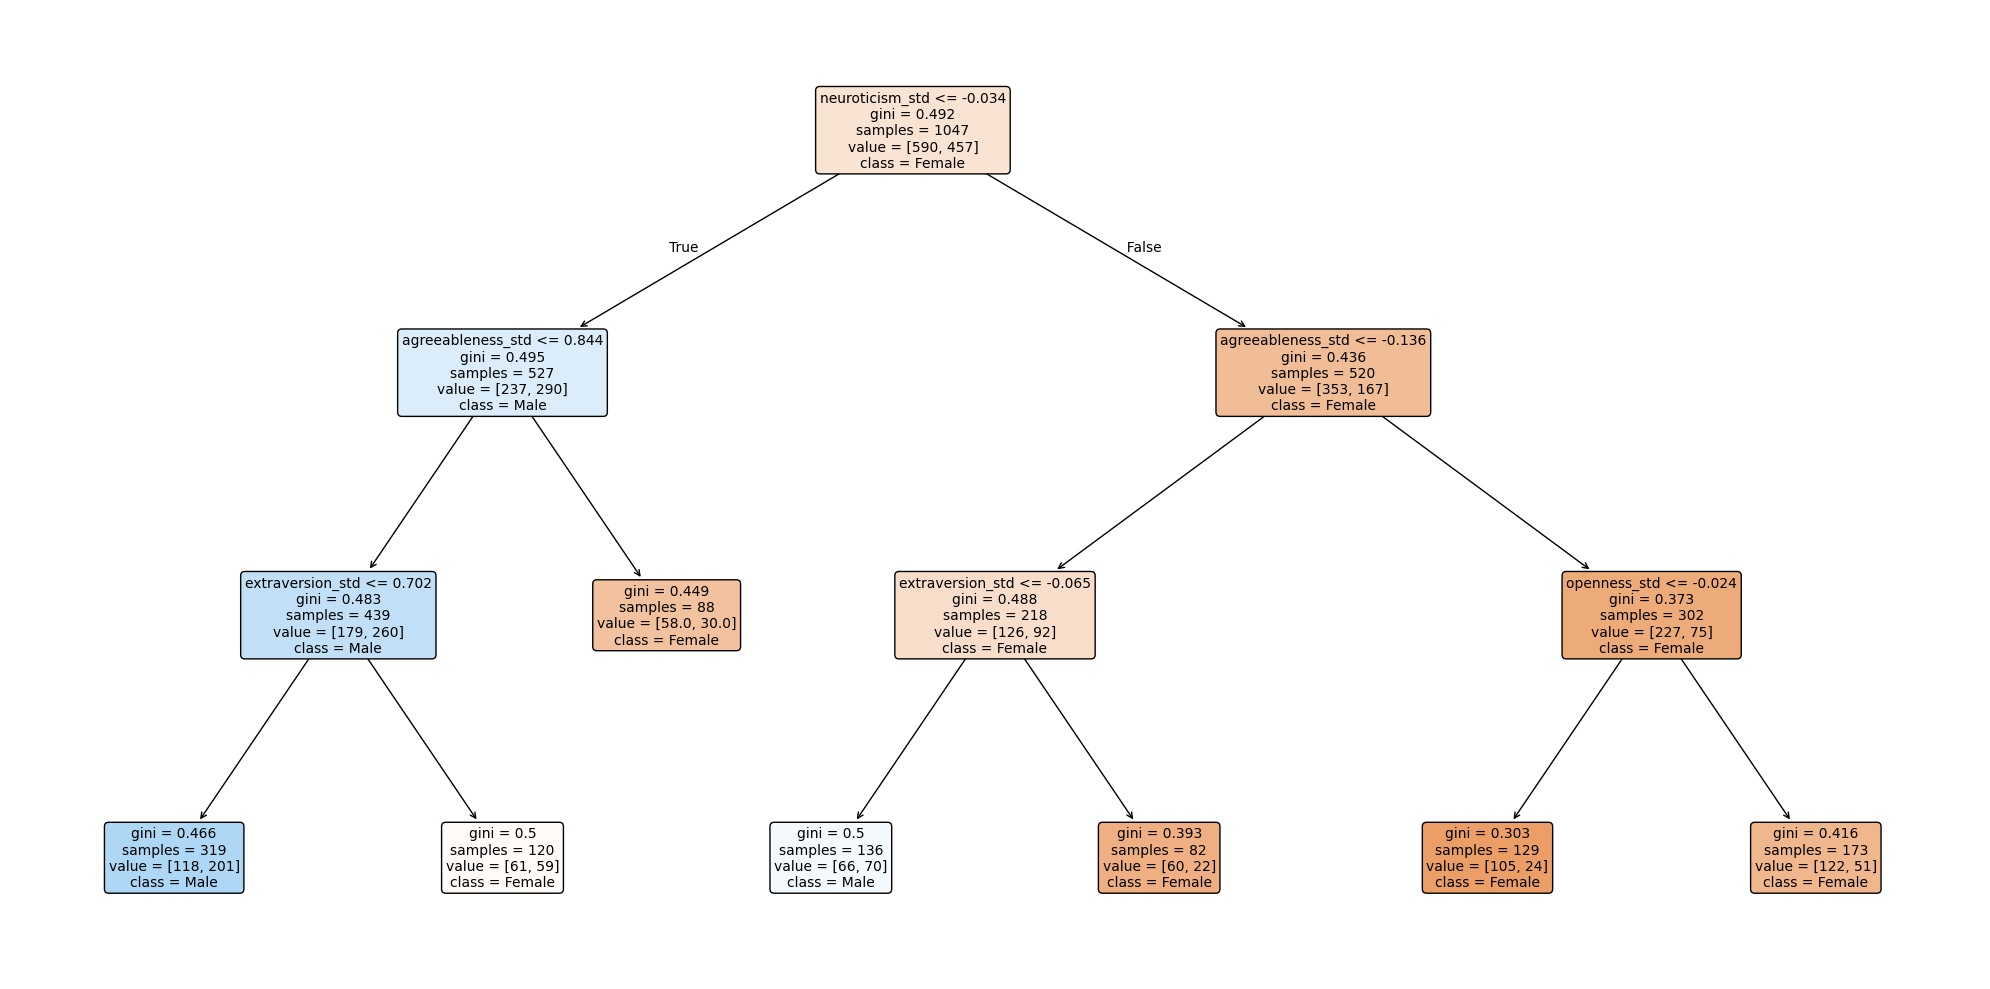

In [401]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model,
          feature_names=traits,
          class_names=['Female', 'Male'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.tight_layout()

In [402]:
# Print feature importance
print("Trait Importance:")
for feat, imp in zip(traits, tree_model.feature_importances_):
    print(f"  {feat}: {imp:.3f}")

Trait Importance:
  openness_std: 0.031
  neuroticism_std: 0.494
  agreeableness_std: 0.303
  extraversion_std: 0.172
  conscientiousness_std: 0.000


i.e. neuroticism most important for predicting gender

In [403]:
dtc().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

now evaluating models performance using both traits and education

In [404]:
# Define columns for X
traits_and_edu = ['openness_std', 'neuroticism_std', 'agreeableness_std',
                'extraversion_std', 'conscientiousness_std',
                'neduc', 'ueduc', 'oheduc', 'Alevel', 'gcse', 'otheduc']

df_tree2 = df[traits_and_edu + [target]].dropna()

X2 = df_tree2[traits_and_edu]
y2 = df_tree2[target]

In [405]:
df_tree2.head()

,openness_std,neuroticism_std,agreeableness_std,extraversion_std,conscientiousness_std,neduc,ueduc,oheduc,Alevel,gcse,otheduc,male
0,1.134772,1.714700,1.334850,0.318156,-0.471428,0.0,0.0,0.0,0.0,0.0,1.0,1
1,-0.410277,1.714700,-0.626826,-0.449034,-0.471428,0.0,0.0,0.0,0.0,1.0,0.0,1
2,-1.955325,0.315594,-0.626826,-0.449034,-0.471428,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.362247,-0.383959,1.334850,1.085346,1.368915,0.0,0.0,0.0,0.0,1.0,0.0,0
4,1.134772,1.015147,0.354012,1.852535,-0.471428,0.0,0.0,0.0,0.0,1.0,0.0,0


In [406]:
tree_model2 = dtc(max_depth=3, min_samples_leaf=50, random_state=3)
tree_model2.fit(X2, y2)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=50, random_state=3)

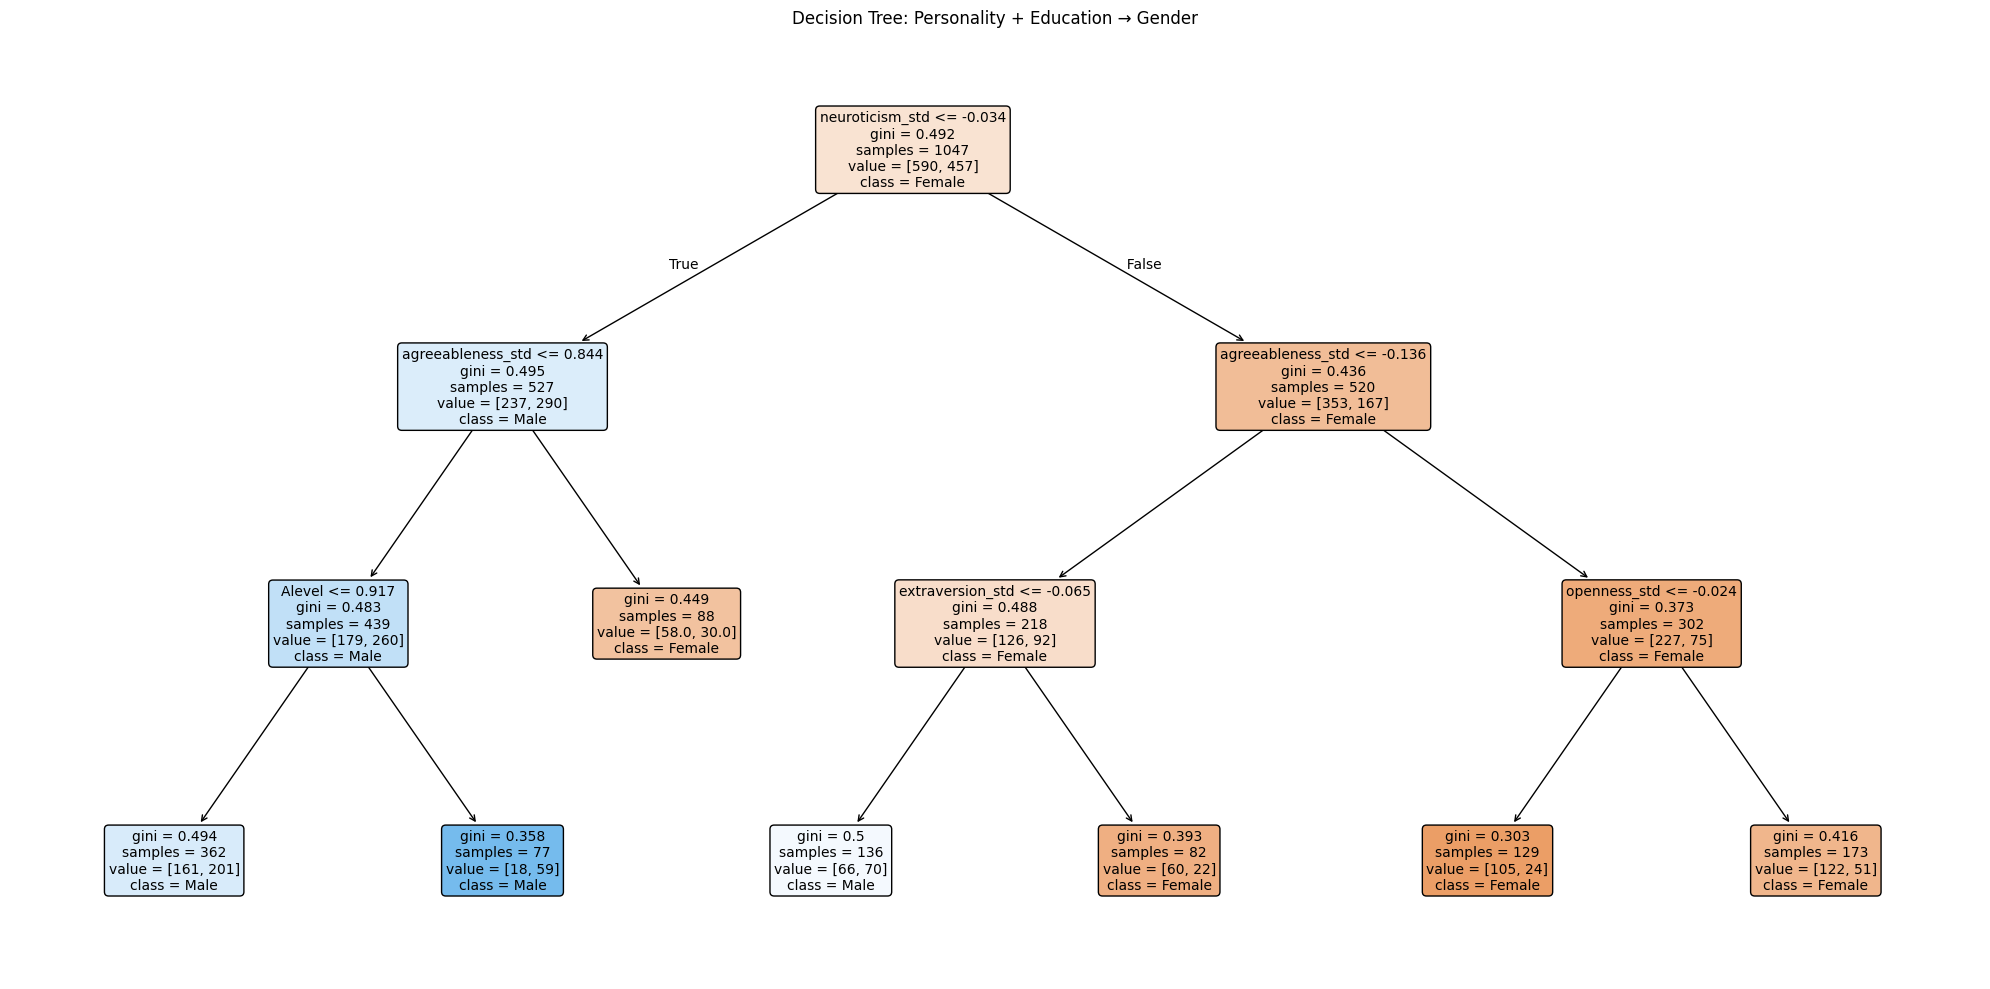

In [407]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model2,
          feature_names=traits_and_edu,
          class_names=['Female', 'Male'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree: Personality + Education → Gender')
plt.tight_layout()
plt.show()

In [408]:
print("Feature Importance:")
for feat, imp in zip(traits_and_edu, tree_model2.feature_importances_):
    print(f"  {feat}: {imp:.3f}")

Feature Importance:
  openness_std: 0.030
  neuroticism_std: 0.474
  agreeableness_std: 0.291
  extraversion_std: 0.107
  conscientiousness_std: 0.000
  neduc: 0.000
  ueduc: 0.000
  oheduc: 0.000
  Alevel: 0.097
  gcse: 0.000
  otheduc: 0.000


Now doing linear regression for both decision trees

In [409]:
print(df.columns.tolist())

['pidp', 'agenew', 'incomecpi', 'male', 'neduc', 'ueduc', 'oheduc', 'Alevel', 'gcse', 'otheduc', 'single', 'married', 'others', 'selfemploy', 'employed', 'unemploy', 'retired', 'sick', 'familycare', 'student', 'onemember', 'twomember', 'member34', 'othersize', 'pomst', 'agesq', 'openness_std', 'neuroticism_std', 'agreeableness_std', 'extraversion_std', 'conscientiousness_std', 'yearid', 'genders', 'marital_status', 'employment_status', 'household_size', 'education']


In [410]:
# Ordinary Least Squares regression results for model 1 (gender & personality traits)

OLS_model1 = sm.OLS(y, X).fit()
print(OLS_model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                   male   R-squared (uncentered):                   0.089
Model:                            OLS   Adj. R-squared (uncentered):              0.085
Method:                 Least Squares   F-statistic:                              20.36
Date:                Thu, 04 Dec 2025   Prob (F-statistic):                    1.98e-19
Time:                        10:06:26   Log-Likelihood:                         -1002.8
No. Observations:                1047   AIC:                                      2016.
Df Residuals:                    1042   BIC:                                      2040.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [411]:
# Ordinary Least Squares regression results for model 2 (gender & traits + education)

OLS_model2 = sm.OLS(y2, X2).fit()
print(OLS_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   male   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     17.04
Date:                Thu, 04 Dec 2025   Prob (F-statistic):           7.20e-29
Time:                        10:06:26   Log-Likelihood:                -671.69
No. Observations:                1047   AIC:                             1365.
Df Residuals:                    1036   BIC:                             1420.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
openness_std              0.06

In [412]:
# Logistic regression results for model 1 (gender & traits)

logit_model1 = sm.Logit(y, X).fit()
print(logit_model1.summary())

Optimization terminated successfully.
         Current function value: 0.626766
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   male   No. Observations:                 1047
Model:                          Logit   Df Residuals:                     1042
Method:                           MLE   Df Model:                            4
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                 0.08509
Time:                        10:06:26   Log-Likelihood:                -656.22
converged:                       True   LL-Null:                       -717.25
Covariance Type:            nonrobust   LLR p-value:                 1.938e-25
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
openness_std              0.3501      0.076      4.619      0.000       0.202       0.

In [413]:
# Logistic regression results for model 2 (gender & traits + education)

logit_model2 = sm.Logit(y2, X2).fit()
print(logit_model2.summary())

Optimization terminated successfully.
         Current function value: 0.608614
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                   male   No. Observations:                 1047
Model:                          Logit   Df Residuals:                     1036
Method:                           MLE   Df Model:                           10
Date:                Thu, 04 Dec 2025   Pseudo R-squ.:                  0.1116
Time:                        10:06:26   Log-Likelihood:                -637.22
converged:                       True   LL-Null:                       -717.25
Covariance Type:            nonrobust   LLR p-value:                 3.131e-29
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
openness_std              0.3296      0.080      4.131      0.000       0.173       0.

New decision tree - personality then educaiton

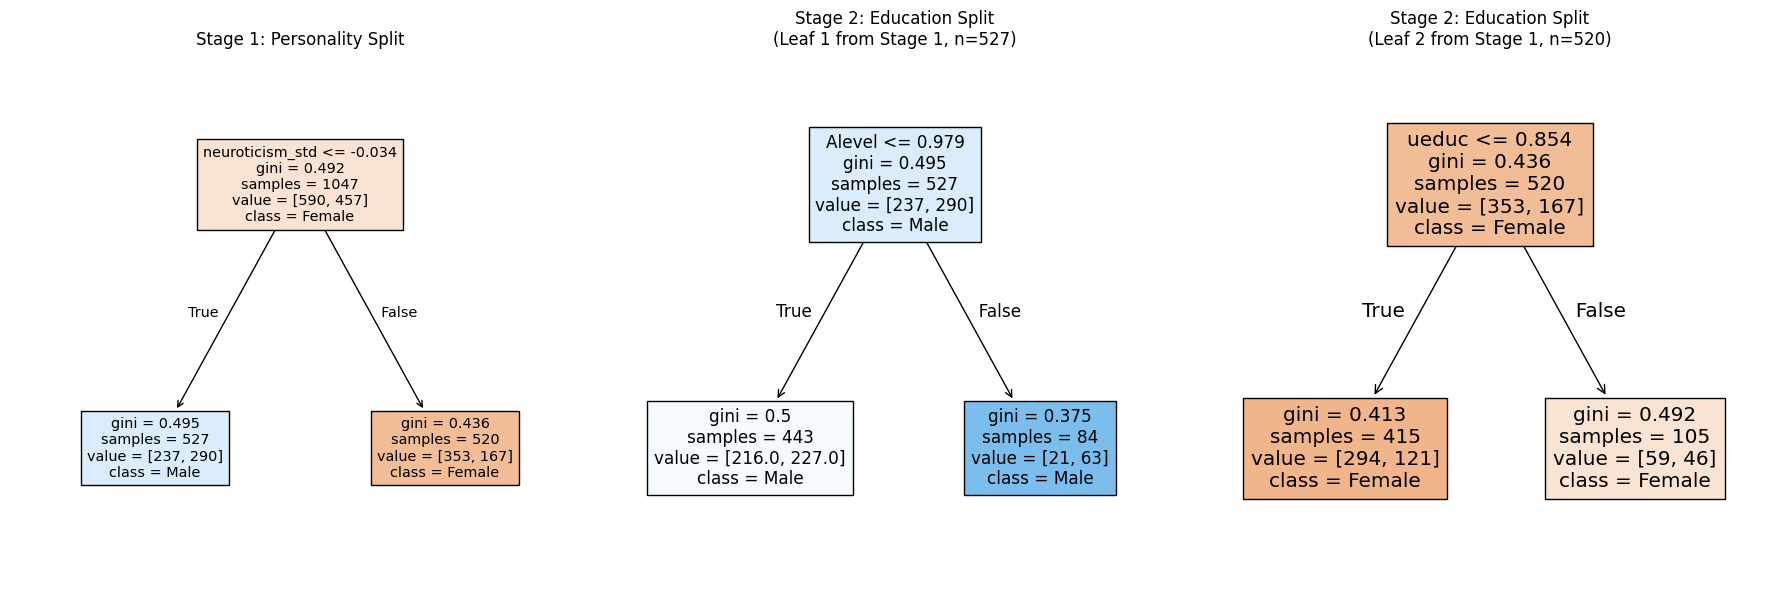

In [414]:
edu_cols = list(education_labels.keys())

# Stage 1: Split on personality only (depth=1 for single split)
tree_stage1 = dtc(max_depth=1, random_state=50)
tree_stage1.fit(df[traits], df['male'])

# Get the split groups
personality_prediction = tree_stage1.apply(df[traits])  # Leaf assignment

# Stage 2: Fit separate trees on education for each personality leaf
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot Stage 1 tree
plot_tree(tree_stage1, feature_names=traits,
          class_names=['Female', 'Male'], filled=True, ax=axes[0])
axes[0].set_title('Stage 1: Personality Split')

# Fit education trees for each leaf
for i, leaf in enumerate(np.unique(personality_prediction)):
    mask = personality_prediction == leaf
    subset = df[mask]

    tree_stage2 = dtc(max_depth=1, random_state=42)
    tree_stage2.fit(subset[edu_cols], subset['male'])

    plot_tree(tree_stage2, feature_names=edu_cols,
              class_names=['Female', 'Male'], filled=True, ax=axes[i+1])
    axes[i+1].set_title(f'Stage 2: Education Split\n(Leaf {i+1} from Stage 1, n={mask.sum()})')

plt.tight_layout()
plt.savefig('two_stage_tree.png', dpi=150, bbox_inches='tight')
plt.show()